# Resnet50

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import plot_model


In [4]:
model = ResNet50(weights='imagenet')
model.summary()

102973440/102967424 [==============================] - 34s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________

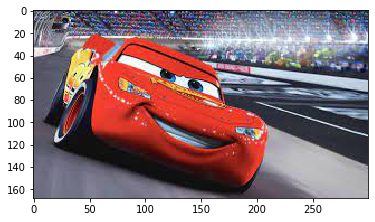

In [5]:
img_path = 'rayo.jpeg'
img = imread(img_path)
plt.imshow(img)
plt.show()
img = resize(img, (224, 224), preserve_range=True) 

In [6]:
x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
features = model.predict(x)

In [7]:
print(features.shape)
print("La clase con mayor probabilidad es la", np.argmax(features))

(1, 1000)
La clase con mayor probabilidad es la 817


In [8]:
label = decode_predictions(features)
label

[[('n04285008', 'sports_car', 0.34683782),
  ('n03709823', 'mailbag', 0.15536402),
  ('n03908714', 'pencil_sharpener', 0.08688502),
  ('n02974003', 'car_wheel', 0.05523665),
  ('n03100240', 'convertible', 0.044423953)]]

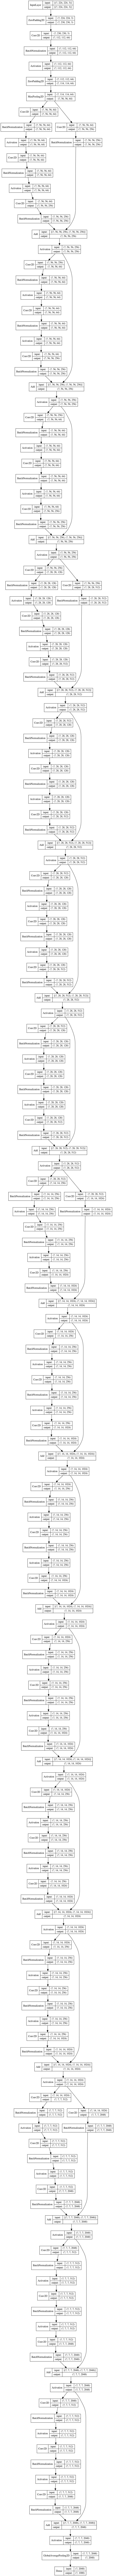

In [9]:
plot_model(model, to_file='modelo-resnet50.png', show_shapes=True, show_layer_names=False)